# Flight Price Prediction
Problem Statement:
Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

Size of training set: 10683 records

Size of test set: 2671 records

In [5]:
#lets Load the dataset and required libraries..

In [6]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.metrics import accuracy_score
import seaborn as sns

In [114]:
df=pd.read_csv('flight_price.csv')
df

Airline Date_of_Journey    Source Destination  \
0           IndiGo      24/03/2019  Banglore   New Delhi   
1        Air India       1/05/2019   Kolkata    Banglore   
2      Jet Airways       9/06/2019     Delhi      Cochin   
3           IndiGo      12/05/2019   Kolkata    Banglore   
4           IndiGo      01/03/2019  Banglore   New Delhi   
...            ...             ...       ...         ...   
10678     Air Asia       9/04/2019   Kolkata    Banglore   
10679    Air India      27/04/2019   Kolkata    Banglore   
10680  Jet Airways      27/04/2019  Banglore       Delhi   
10681      Vistara      01/03/2019  Banglore   New Delhi   
10682    Air India       9/05/2019     Delhi      Cochin   

                       Route Dep_Time  Arrival_Time Duration Total_Stops  \
0                  BLR ? DEL    22:20  01:10 22 Mar   2h 50m    non-stop   
1      CCU ? IXR ? BBI ? BLR    05:50         13:15   7h 25m     2 stops   
2      DEL ? LKO ? BOM ? COK    09:25  04:25 10 Jun      19h     2 stops   
3            CCU ? NAG ? BLR    18:05         23:30   5h 25m      1 stop   
4            BLR ? NAG ? DEL    16:50         21:35   4h 45m      1 stop   
...                      ...      ...           ...      ...         ...   
10678              CCU ? BLR    19:55         22:25   2h 30m    non-stop   
10679              CCU ? BLR    20:45         23:20   2h 35m    non-stop   
10680              BLR ? DEL    08:20         11:20       3h    non-stop   
10681              BLR ? DEL    11:30         14:10   2h 40m    non-stop   
10682  DEL ? GOI ? BOM ? COK    10:55         19:15   8h 20m     2 stops   

      Additional_Info  Price  
0             No info   3897  
1             No info   7662  
2             No info  13882  
3             No info   6218  
4             No info  13302  
...               ...    ...  
10678         No info   4107  
10679         No info   4145  
10680         No info   7229  
10681         No info  12648  
10682         No info  11753  

[10683 rows x 11 columns]

Here we can easily se that price attibute defines the price of the ticket and also the output variable.;and rest of the variables are input variables.

# EDA Process:
In choosing the right features to feed into our model, we want to capture the input variables most strongly related to the target variable.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


observations:

1.from above code we can easily find that there is 2 nan values are present in dataset.

In [9]:
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

observations:

1.from above code we find that major variables are object type and Price is only the int data type.

In [10]:
df.shape

(10683, 11)

observations:
    
1. 10683 rows and 11 columns are present in dataset

In [11]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

10262    258
10844    212
7229     162
4804     160
4823     131
        ... 
9502       1
13875      1
7742       1
5703       1
4098       1
Name: Price, Length: 1870, dtype: int64

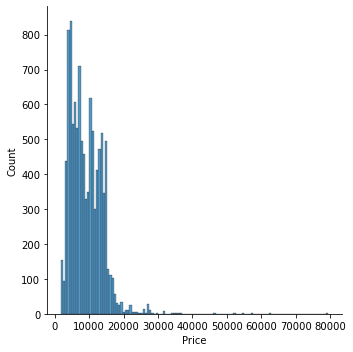

In [12]:
sns.displot(df['Price'])
df.Price.value_counts()

Observations:

1.As seen from above distribution plot that Price are not equally distributed.

2.Major Price are distributed between 4823 - 10262 rupees.

In [13]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [14]:
df.isnull()

Airline  Date_of_Journey  Source  Destination  Route  Dep_Time  \
0        False            False   False        False  False     False   
1        False            False   False        False  False     False   
2        False            False   False        False  False     False   
3        False            False   False        False  False     False   
4        False            False   False        False  False     False   
...        ...              ...     ...          ...    ...       ...   
10678    False            False   False        False  False     False   
10679    False            False   False        False  False     False   
10680    False            False   False        False  False     False   
10681    False            False   False        False  False     False   
10682    False            False   False        False  False     False   

       Arrival_Time  Duration  Total_Stops  Additional_Info  Price  
0             False     False        False            False  False  
1             False     False        False            False  False  
2             False     False        False            False  False  
3             False     False        False            False  False  
4             False     False        False            False  False  
...             ...       ...          ...              ...    ...  
10678         False     False        False            False  False  
10679         False     False        False            False  False  
10680         False     False        False            False  False  
10681         False     False        False            False  False  
10682         False     False        False            False  False  

[10683 rows x 11 columns]

<AxesSubplot:>

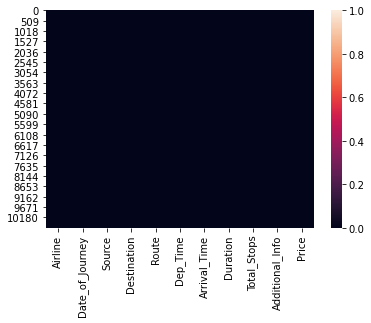

In [15]:
import seaborn as sns
sns.heatmap(df.isnull())

Observations:
    
    1. Nan values are present in the dataset.

# Drop NaN/Null values

In [16]:
#drop the nullvalues
df.dropna(inplace=True)

In [17]:
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

The datatypes of Date_of_journey, Arrival_Time and Dep_Time are object here. So at fist, need to convert it to to_datetime for proper predicion.

<AxesSubplot:>

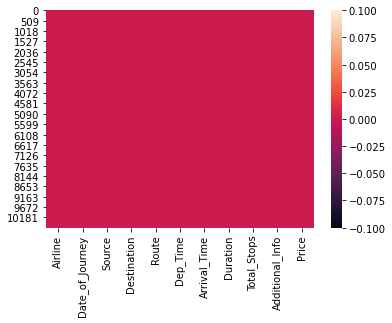

In [18]:
import seaborn as sns
sns.heatmap(df.isnull())

Observations:
    
    Nan values are treaded and no further nan values are present. 

In [19]:
df

Airline Date_of_Journey    Source Destination  \
0           IndiGo      24/03/2019  Banglore   New Delhi   
1        Air India       1/05/2019   Kolkata    Banglore   
2      Jet Airways       9/06/2019     Delhi      Cochin   
3           IndiGo      12/05/2019   Kolkata    Banglore   
4           IndiGo      01/03/2019  Banglore   New Delhi   
...            ...             ...       ...         ...   
10678     Air Asia       9/04/2019   Kolkata    Banglore   
10679    Air India      27/04/2019   Kolkata    Banglore   
10680  Jet Airways      27/04/2019  Banglore       Delhi   
10681      Vistara      01/03/2019  Banglore   New Delhi   
10682    Air India       9/05/2019     Delhi      Cochin   

                       Route Dep_Time  Arrival_Time Duration Total_Stops  \
0                  BLR ? DEL    22:20  01:10 22 Mar   2h 50m    non-stop   
1      CCU ? IXR ? BBI ? BLR    05:50         13:15   7h 25m     2 stops   
2      DEL ? LKO ? BOM ? COK    09:25  04:25 10 Jun      19h     2 stops   
3            CCU ? NAG ? BLR    18:05         23:30   5h 25m      1 stop   
4            BLR ? NAG ? DEL    16:50         21:35   4h 45m      1 stop   
...                      ...      ...           ...      ...         ...   
10678              CCU ? BLR    19:55         22:25   2h 30m    non-stop   
10679              CCU ? BLR    20:45         23:20   2h 35m    non-stop   
10680              BLR ? DEL    08:20         11:20       3h    non-stop   
10681              BLR ? DEL    11:30         14:10   2h 40m    non-stop   
10682  DEL ? GOI ? BOM ? COK    10:55         19:15   8h 20m     2 stops   

      Additional_Info  Price  
0             No info   3897  
1             No info   7662  
2             No info  13882  
3             No info   6218  
4             No info  13302  
...               ...    ...  
10678         No info   4107  
10679         No info   4145  
10680         No info   7229  
10681         No info  12648  
10682         No info  11753  

[10682 rows x 11 columns]

In [20]:
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

Observations:
    
    1. Major columns are object datatype hence we label encode them for learning.

# Univariate analysis
Univariate analysis is the simplest form of analyzing data.

#lets start with Distribution ploting.

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

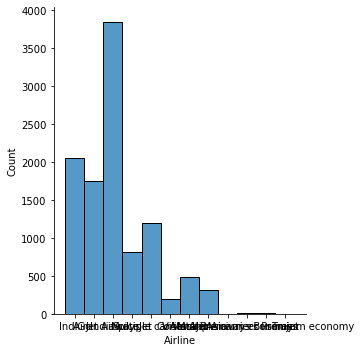

In [21]:
sns.displot(df['Airline'])
df.Airline.value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

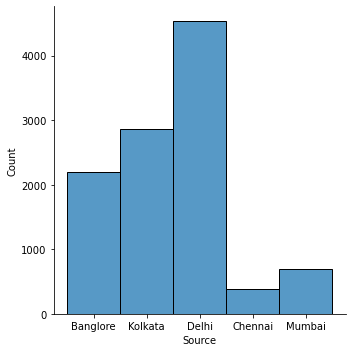

In [22]:
sns.displot(df['Source'])
df.Source.value_counts()

Observations:

1. from above ploting we can easily find that data is not distributed normally.
2. Delhi and kolkata is anomg the most common Source.

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

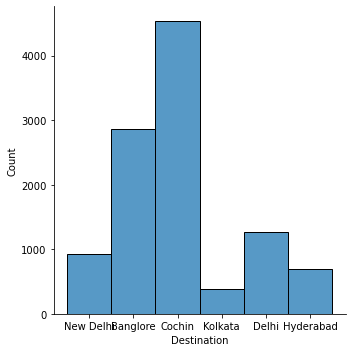

In [23]:
sns.displot(df['Destination'])
df.Destination.value_counts()

2h 50m     550
1h 30m     386
2h 55m     337
2h 45m     337
2h 35m     329
          ... 
30h 15m      1
30h 25m      1
3h 25m       1
41h 20m      1
40h 20m      1
Name: Duration, Length: 368, dtype: int64

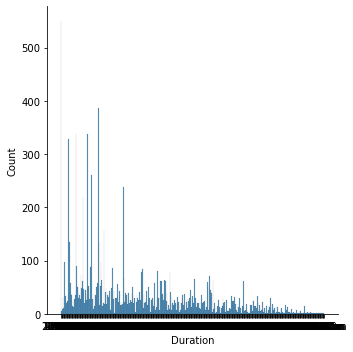

In [24]:
sns.displot(df['Duration'])
df.Duration.value_counts()

# Multivariate Analysis
Multivariate analysis is a set of techniques used for analysis of data sets that contain more than one variable

<AxesSubplot:xlabel='Price', ylabel='Airline'>

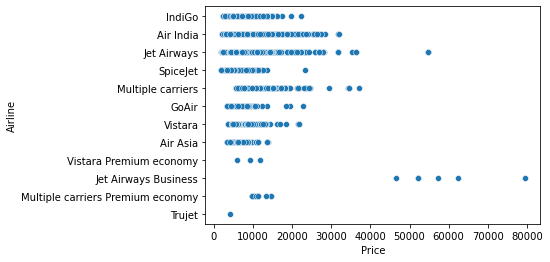

In [25]:
import seaborn as sns
sns.scatterplot(y="Airline",x= "Price",data=df)

In [26]:
import plotly.express as px
fig = px.histogram(df, 
                   x='Price', 
                   marginal='box', 
                   color='Airline', 
                   color_discrete_sequence=['green', 'grey','red','orange','blue','blueviolet', 'brown', 'burlywood', 'chocolate', 'darkblue','olive','pink'], 
                   title='Airline vs Price')
fig.update_layout(bargap=0.1)
fig.show()

Observations:
    
    1.From above plotting we can easily find and see the pricing of each individual flight and there classes and pricing.

In [27]:
fig = px.scatter(df, 
                 x='Total_Stops', 
                 y='Price', 
                 color='Source', 
                 opacity=0.8, 
                 hover_data=['Airline'], 
                 title='Total_Stops vs. Price')
fig.update_traces(marker_size=5)
fig.show()

Observations:
    
    1. stop flights having maximum pricing and 4stops flight having lesser pricing .

# Source vs Price visualization with bar plot

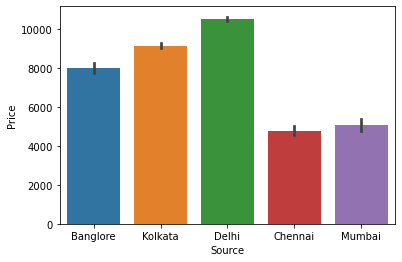

In [28]:
sns.barplot(data=df, x='Source', y='Price');

Observations:
    
    1. Maximum people choose delhi and kolkata as there source airport.

# Destination vs Price with box plot

<AxesSubplot:xlabel='Destination', ylabel='Price'>

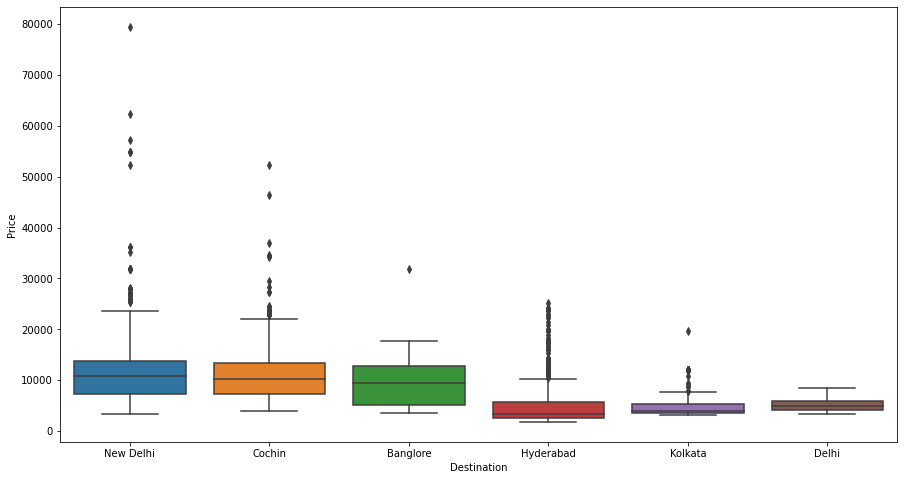

In [29]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
sns.boxplot(x='Destination',y='Price',data=df.sort_values('Price',ascending=False))

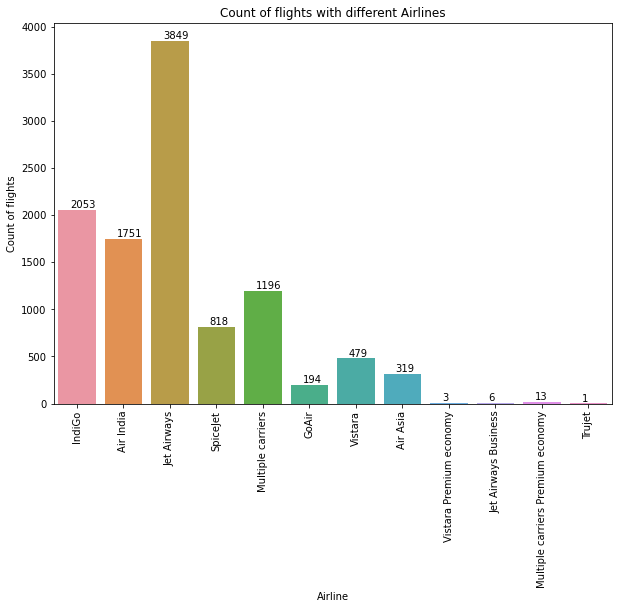

In [30]:
plt.figure(figsize = (10, 7))
plt.title('Count of flights with different Airlines')
ax=sns.countplot(x = 'Airline', data =df)
plt.xlabel('Airline')
plt.ylabel('Count of flights')
plt.xticks(rotation = 90)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom',
                    color= 'black')

Observations:
    
    clearly find that maximum no of flights are from jet airways. 

# Label Encode the following Features:
we use labele Encoder for changing types of object data type to int datatype

In [115]:
x=df.drop('Price', axis=1)

In [116]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()



In [117]:
df1=x.apply(LabelEncoder().fit_transform)

In [118]:
Price=df['Price']

In [119]:
df1['Price']=Price

In [120]:
df1

Airline  Date_of_Journey  Source  Destination  Route  Dep_Time  \
0            3               24       0            5     18       211   
1            1                6       3            0     84        31   
2            4               43       2            1    118        70   
3            3               10       3            0     91       164   
4            3                0       0            5     29       149   
...        ...              ...     ...          ...    ...       ...   
10678        0               41       3            0     64       183   
10679        1               29       3            0     64       193   
10680        4               29       0            2     18        58   
10681       10                0       0            5     18        92   
10682        1               42       2            1    108        85   

       Arrival_Time  Duration  Total_Stops  Additional_Info  Price  
0               233       240            4                8   3897  
1               906       336            1                8   7662  
2               413       106            1                8  13882  
3              1324       311            0                8   6218  
4              1237       303            0                8  13302  
...             ...       ...          ...              ...    ...  
10678          1259       236            4                8   4107  
10679          1305       237            4                8   4145  
10680           824       280            4                8   7229  
10681           938       238            4                8  12648  
10682          1124       347            1                8  11753  

[10683 rows x 11 columns]

# CORRELATION BETWEEN THE COLUMNS:

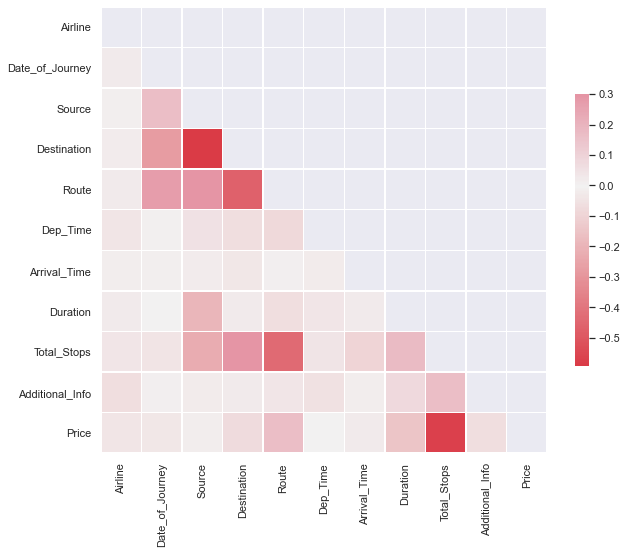

In [37]:
import matplotlib.pyplot as plt
import numpy as np
correlations = df1.corr()
sns.set(style='dark')
cmap = sns.diverging_palette(10, 5, as_cmap=True)
mask = np.zeros_like(correlations, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(10,10))
sns.heatmap(correlations, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

<AxesSubplot:>

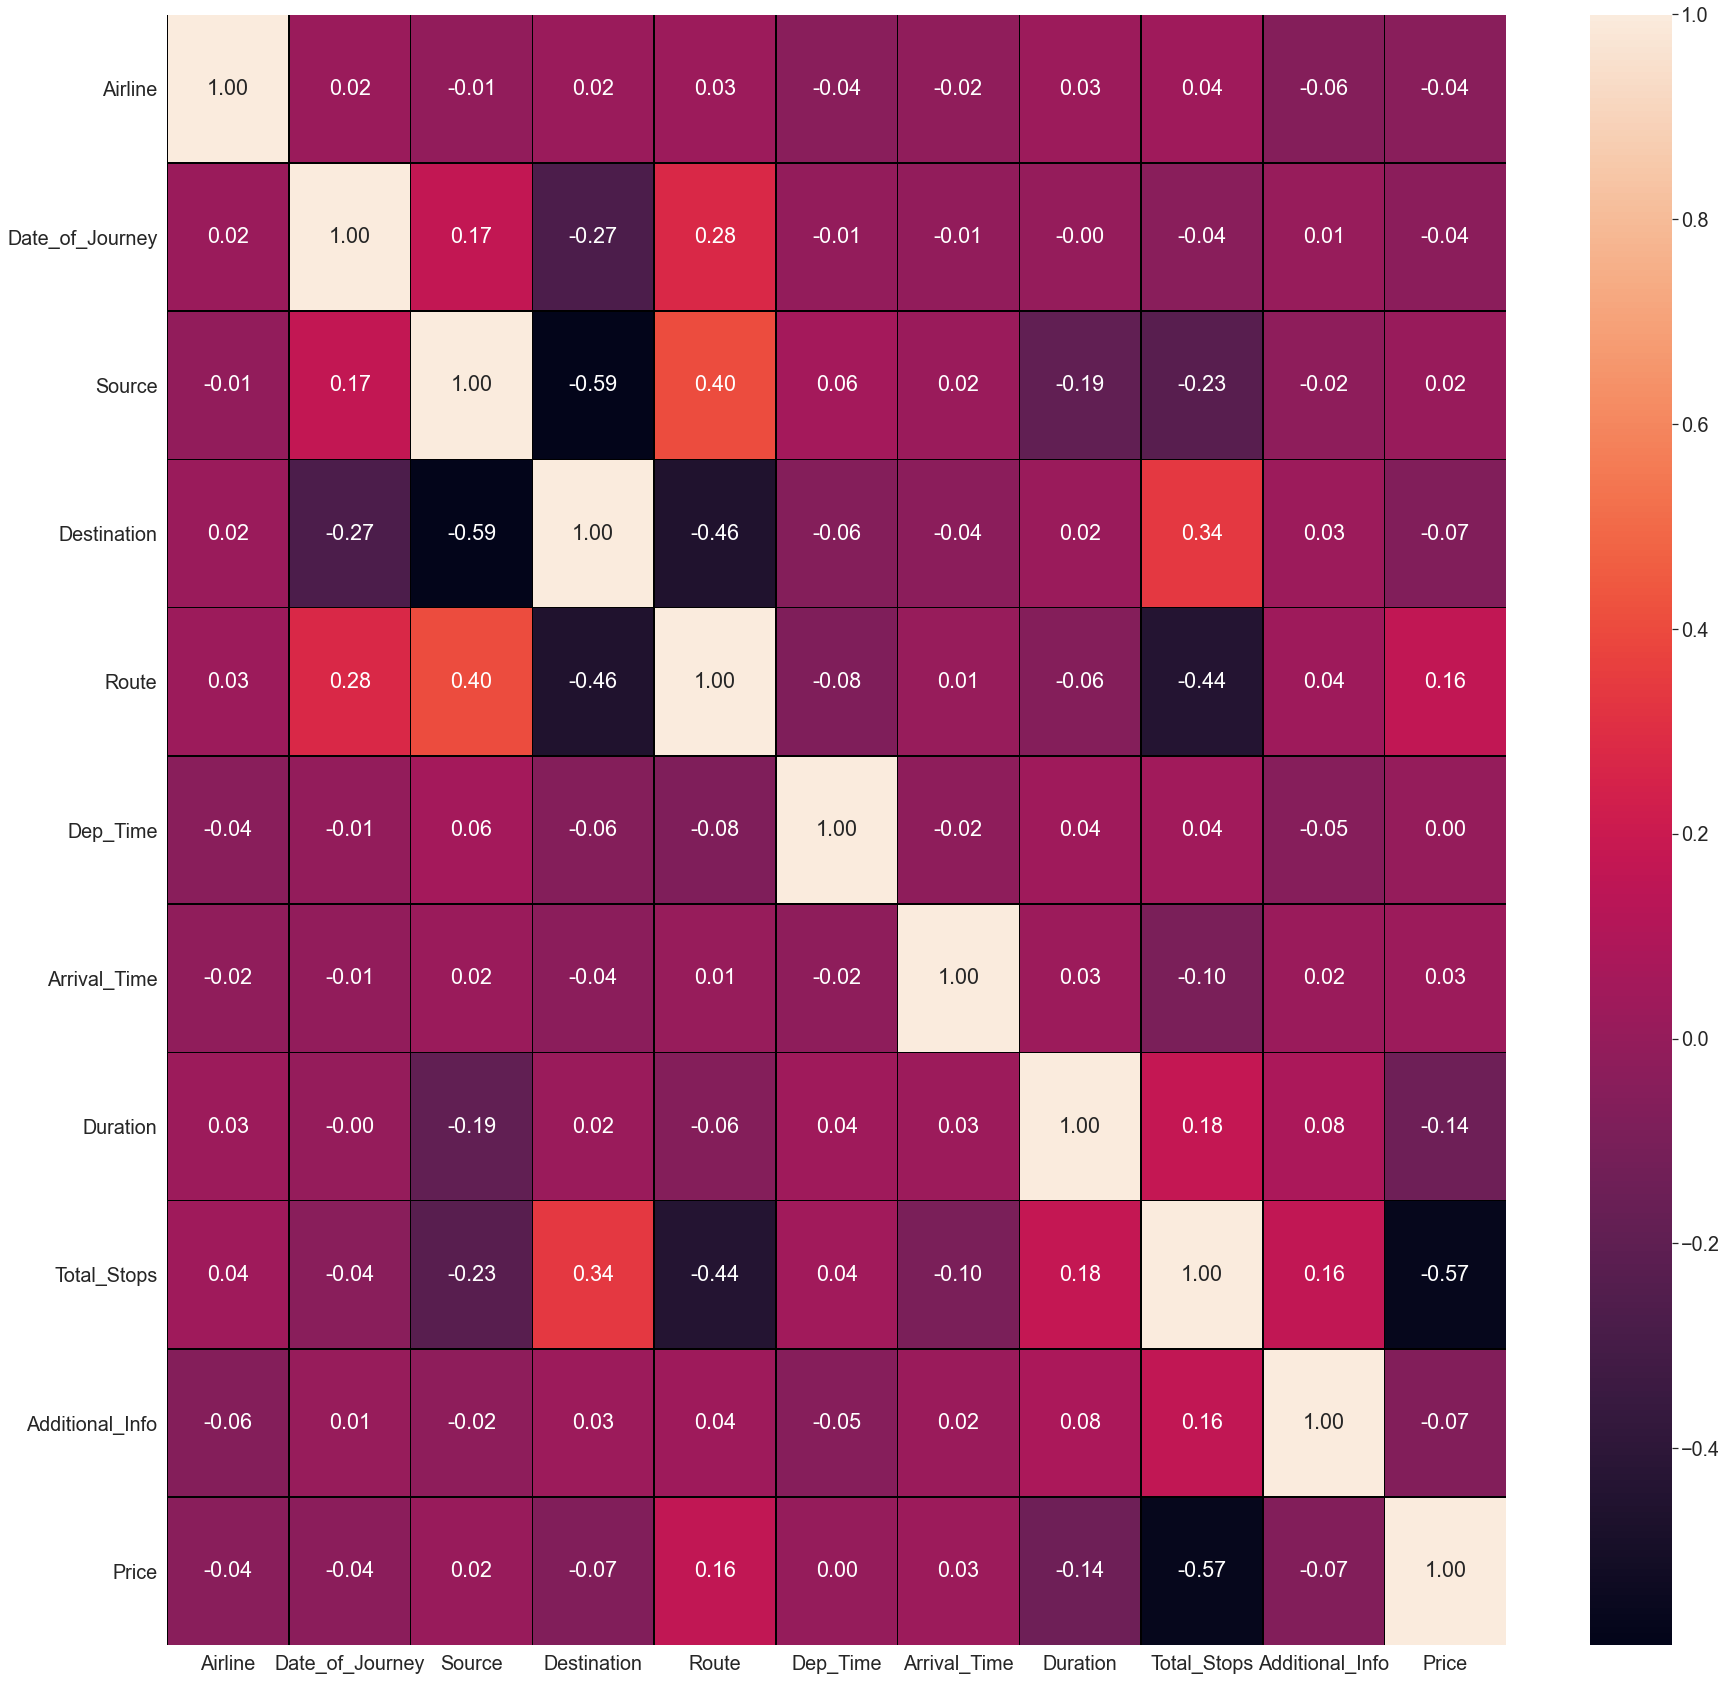

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(30,30))
sns.set(font_scale=1.8)
sns.heatmap(df1.corr(), annot=True, linewidths=0.5,linecolor="black", fmt= '.2f')

Observations:

1.Feature columns are not much collinear.

# Discription of dataset

In [39]:
df1.describe()

Airline  Date_of_Journey        Source   Destination  \
count  10682.000000     10682.000000  10682.000000  10682.000000   
mean       3.966205        23.733758      1.952256      1.436154   
std        2.352090        12.337569      1.177276      1.474845   
min        0.000000         0.000000      0.000000      0.000000   
25%        3.000000        14.000000      2.000000      0.000000   
50%        4.000000        24.000000      2.000000      1.000000   
75%        4.000000        35.000000      3.000000      2.000000   
max       11.000000        43.000000      4.000000      5.000000   

              Route      Dep_Time  Arrival_Time      Duration   Total_Stops  \
count  10682.000000  10682.000000  10682.000000  10682.000000  10682.000000   
mean      74.820165    107.983898    869.846564    194.072177      1.458248   
std       36.729039     61.087537    331.519717    108.625225      1.806320   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%       48.000000     55.000000    603.000000    106.000000      0.000000   
50%       73.000000     96.000000    937.000000    233.000000      0.000000   
75%      104.000000    164.000000   1141.000000    280.000000      4.000000   
max      127.000000    221.000000   1342.000000    367.000000      4.000000   

       Additional_Info         Price  
count     10682.000000  10682.000000  
mean          7.392998   9087.214567  
std           1.214254   4611.548810  
min           0.000000   1759.000000  
25%           8.000000   5277.000000  
50%           8.000000   8372.000000  
75%           8.000000  12373.000000  
max           9.000000  79512.000000

# PLOTTING THE DISCRIPTION OF DATASET

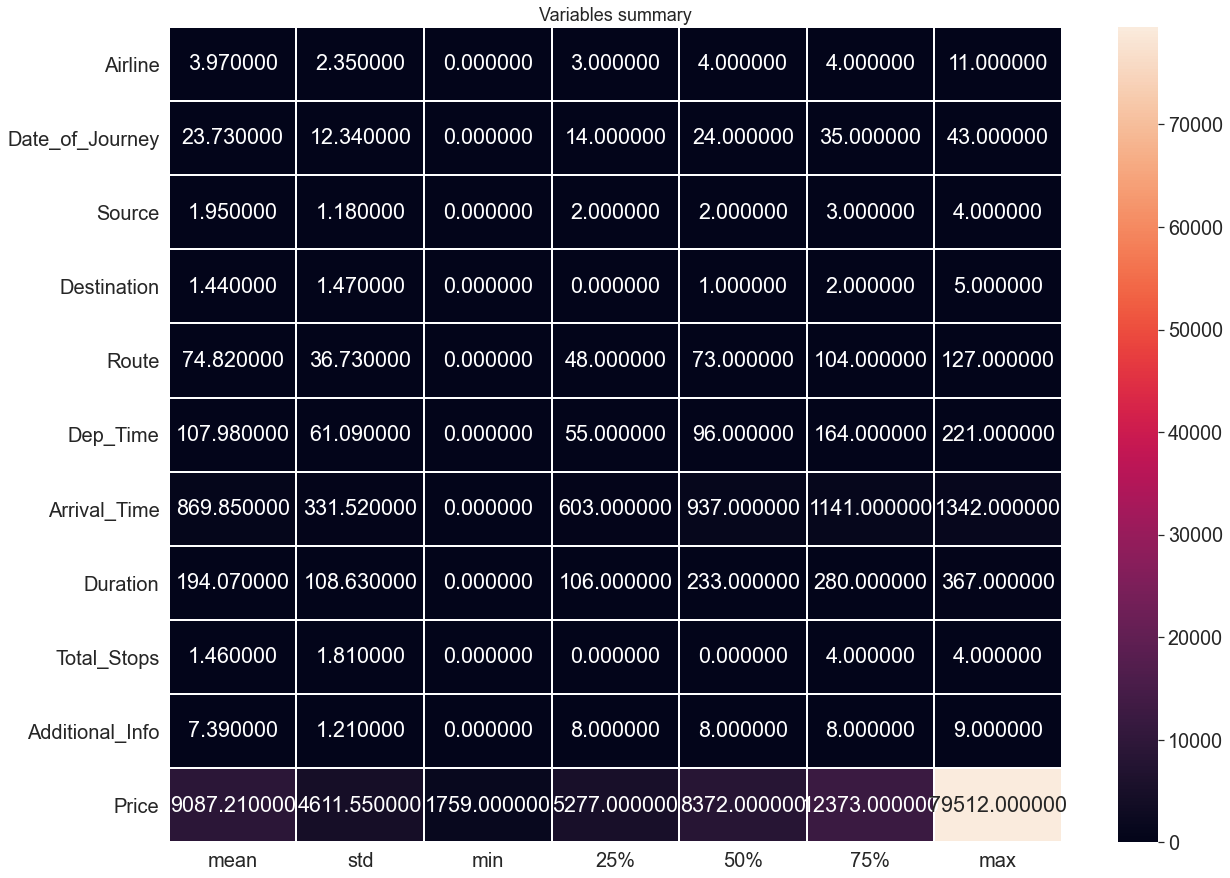

In [40]:
plt.figure(figsize=(20,15))
sns.heatmap(round(df1.describe()[1:].transpose(),2),linewidth=1,annot=True,fmt="f")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
sns.set(font_scale=1.5)
plt.title("Variables summary")
plt.show()


Observations:
    
    1.From above plotting we can find mean,std,min,25%,50%,75% and max data of the following dataset.
    

In [41]:
df=df1

# Principal component analysis
Principal component analysis (PCA) is the process of computing the principal components. and cheak the collinearity.

In [42]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [43]:
x=df.drop('Price', axis=1)

In [44]:
y=df["Price"]

In [45]:
def vif_calc():
    vif=pd.DataFrame()
    vif["VIF Factor"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif["features"]=x.columns
    print(vif)

In [46]:
vif_calc()

   VIF Factor         features
0    3.681280          Airline
1    5.082983  Date_of_Journey
2    5.710797           Source
3    3.032399      Destination
4    7.904040            Route
5    3.913048         Dep_Time
6    0.523028     Arrival_Time
7    4.409767         Duration
8    2.322835      Total_Stops
9   21.506743  Additional_Info


In [121]:
df = df1.drop(['Additional_Info'], axis=1)

In [122]:
df

Airline  Date_of_Journey  Source  Destination  Route  Dep_Time  \
0            3               24       0            5     18       211   
1            1                6       3            0     84        31   
2            4               43       2            1    118        70   
3            3               10       3            0     91       164   
4            3                0       0            5     29       149   
...        ...              ...     ...          ...    ...       ...   
10678        0               41       3            0     64       183   
10679        1               29       3            0     64       193   
10680        4               29       0            2     18        58   
10681       10                0       0            5     18        92   
10682        1               42       2            1    108        85   

       Arrival_Time  Duration  Total_Stops  Price  
0               233       240            4   3897  
1               906       336            1   7662  
2               413       106            1  13882  
3              1324       311            0   6218  
4              1237       303            0  13302  
...             ...       ...          ...    ...  
10678          1259       236            4   4107  
10679          1305       237            4   4145  
10680           824       280            4   7229  
10681           938       238            4  12648  
10682          1124       347            1  11753  

[10683 rows x 10 columns]

we drop highly correlated columns..

# Checking the Correlation Matrix
After dropping highly negative and correlated variables now let's check the correlation matrix again

<AxesSubplot:>

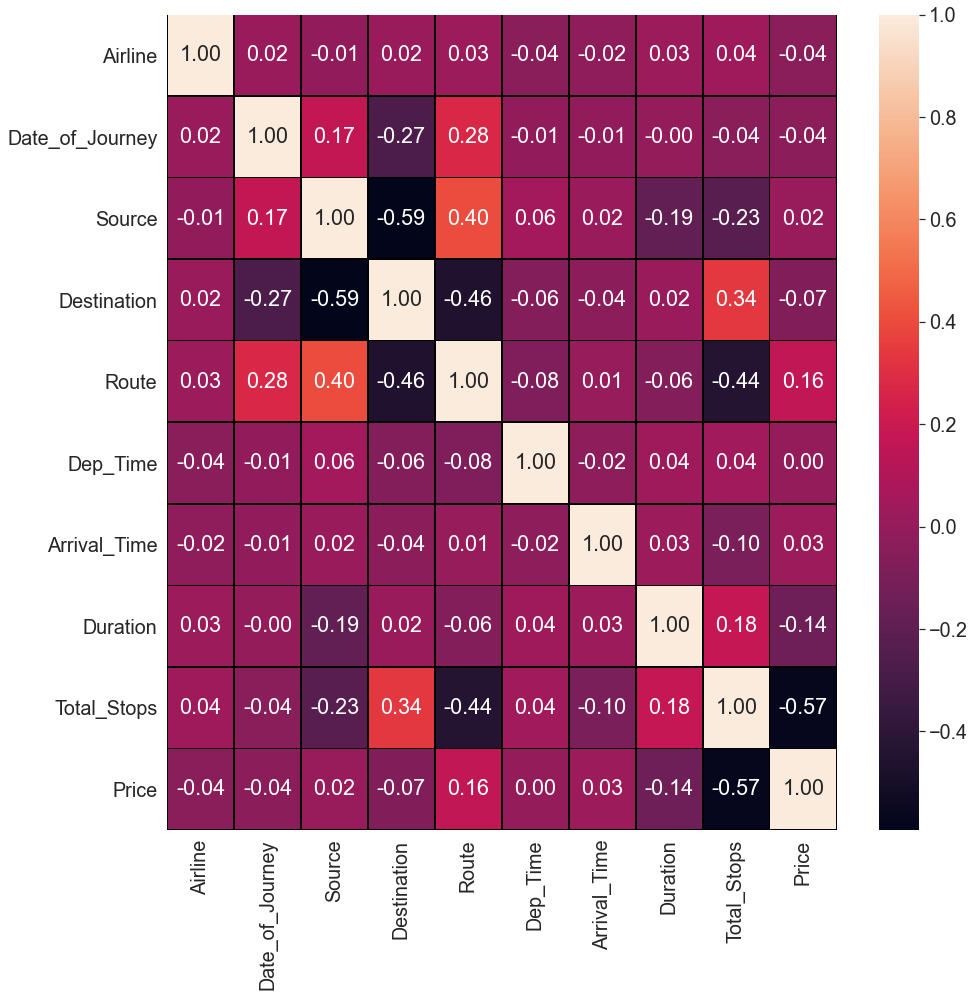

In [123]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
sns.set(font_scale=1.8)
sns.heatmap(df.corr(), annot=True, linewidths=0.5,linecolor="black", fmt= '.2f')

In [124]:
x=df.drop('Price', axis=1)

In [125]:
def vif_calc():
    vif=pd.DataFrame()
    vif["VIF Factor"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif["features"]=x.columns
    print(vif)

In [126]:
vif_calc()

   VIF Factor         features
0    3.632204          Airline
1    4.914888  Date_of_Journey
2    5.231601           Source
3    2.525963      Destination
4    6.902836            Route
5    3.763648         Dep_Time
6    0.459978     Arrival_Time
7    4.110238         Duration
8    2.179734      Total_Stops


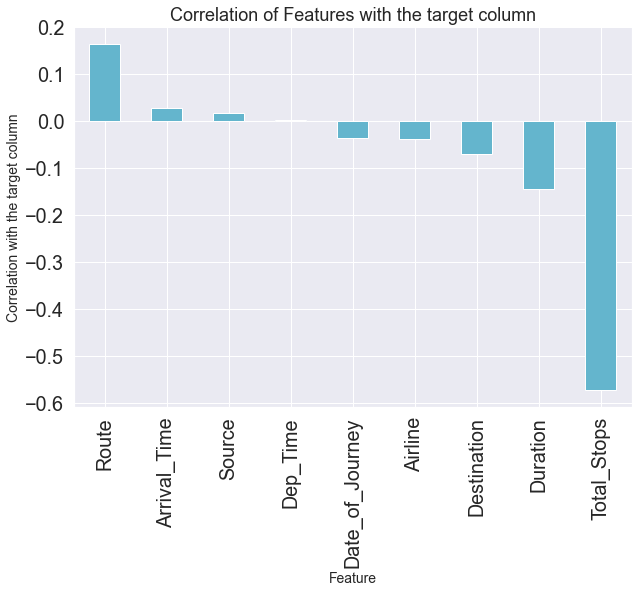

In [127]:
plt.figure(figsize=(10,7))
df.corr()['Price'].sort_values(ascending=False).drop(['Price']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('Correlation with the target column',fontsize=14)
plt.title('Correlation of Features with the target column',fontsize=18)
plt.show()


array([[<AxesSubplot:title={'center':'Airline'}>,
        <AxesSubplot:title={'center':'Date_of_Journey'}>,
        <AxesSubplot:title={'center':'Source'}>],
       [<AxesSubplot:title={'center':'Destination'}>,
        <AxesSubplot:title={'center':'Route'}>,
        <AxesSubplot:title={'center':'Dep_Time'}>],
       [<AxesSubplot:title={'center':'Arrival_Time'}>,
        <AxesSubplot:title={'center':'Duration'}>,
        <AxesSubplot:title={'center':'Total_Stops'}>],
       [<AxesSubplot:title={'center':'Price'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

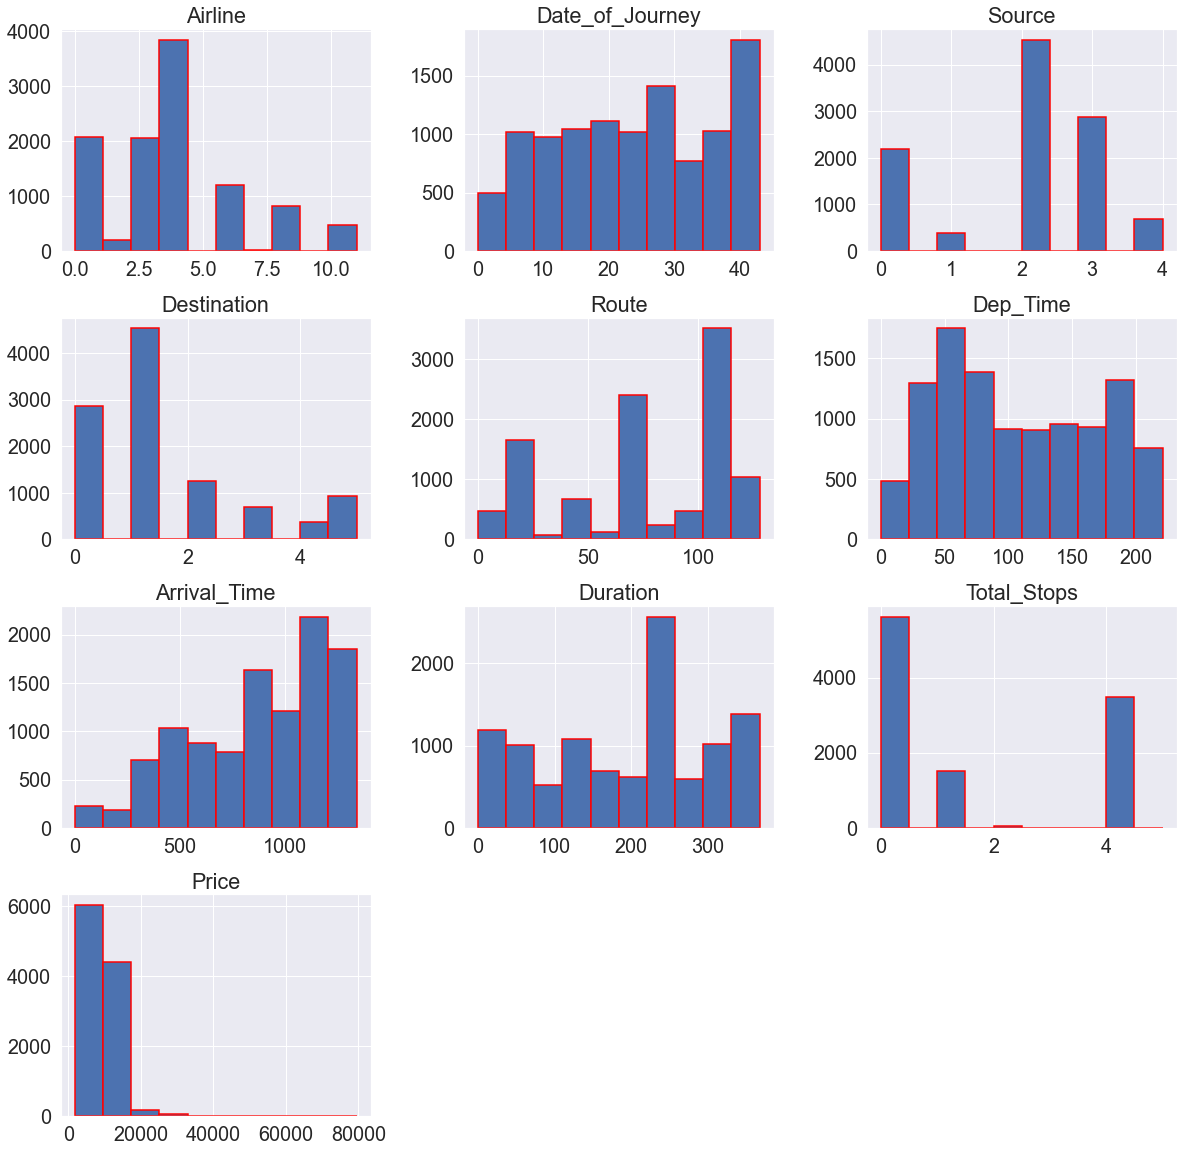

In [128]:
df.hist(edgecolor='red',linewidth=1.5,figsize=(20,20))

# Cheak the skewness:

Now use subplot and displot to check data are normalised or not.

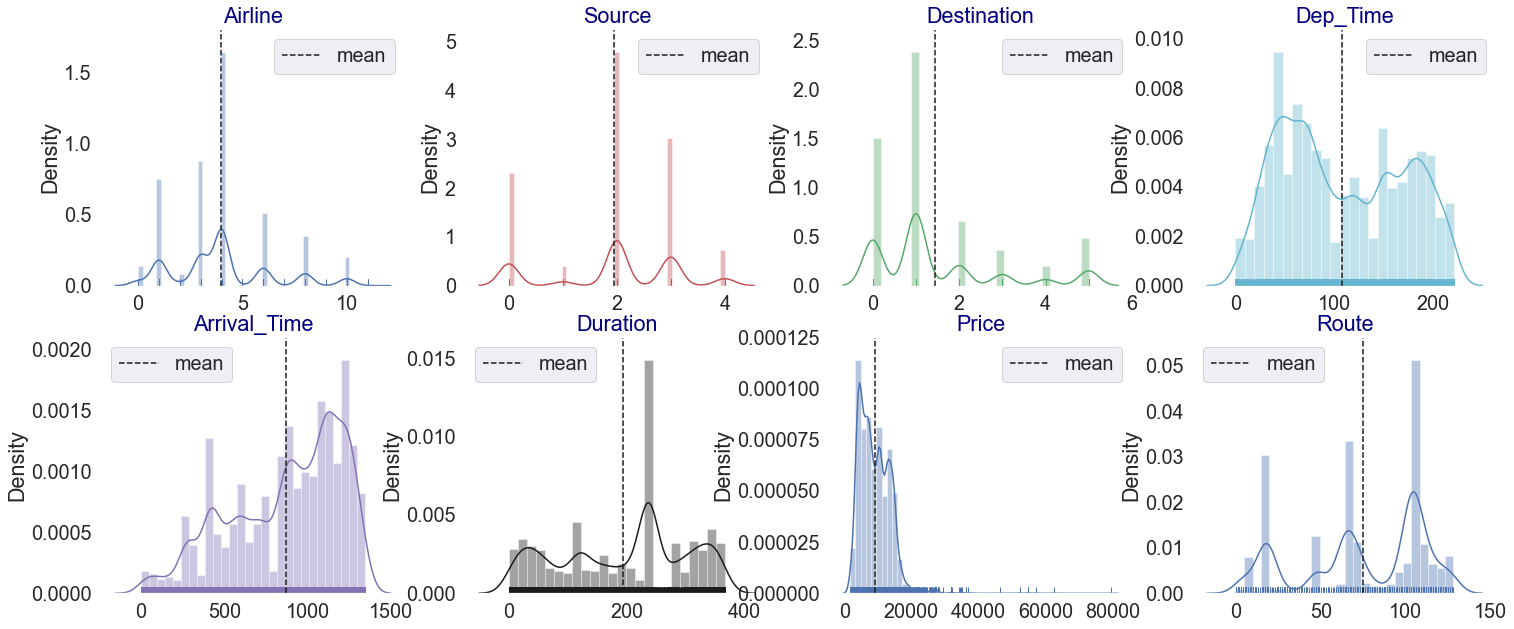

In [130]:
import itertools
import matplotlib.pyplot as plt
cols = ['Airline', 'Source', 'Destination', 'Dep_Time', 'Arrival_Time',
       'Duration', 'Price','Route']
length = len(cols)
cs = ["b","r","g","c","m","k"]
fig = plt.figure(figsize=(25,50))

for i,j,k in itertools.zip_longest(cols,range(length),cs):
    plt.subplot(9,4,j+1)
    ax = sns.distplot(df[i],color=k,rug=True)
    ax.set_facecolor("w")
    plt.axvline(df[i].mean(),linestyle="dashed",label="mean",color="k")
    plt.legend(loc="best")
    plt.title(i,color="navy")
    plt.xlabel("")

observations:

1. From above plotting of distribution plot we see that some features columns are not normally distributed.

2. some columns are skewed towards right.

3. Building blocks are out of the normal curve hence outliers are present.

In [131]:
df.skew()

Airline            0.731095
Date_of_Journey   -0.070888
Source            -0.424054
Destination        1.244169
Route             -0.501909
Dep_Time           0.195055
Arrival_Time      -0.606530
Duration          -0.213427
Total_Stops        0.631375
Price              1.812552
dtype: float64

# Detecting outliers:

In [132]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops', 'Price'],
      dtype='object')

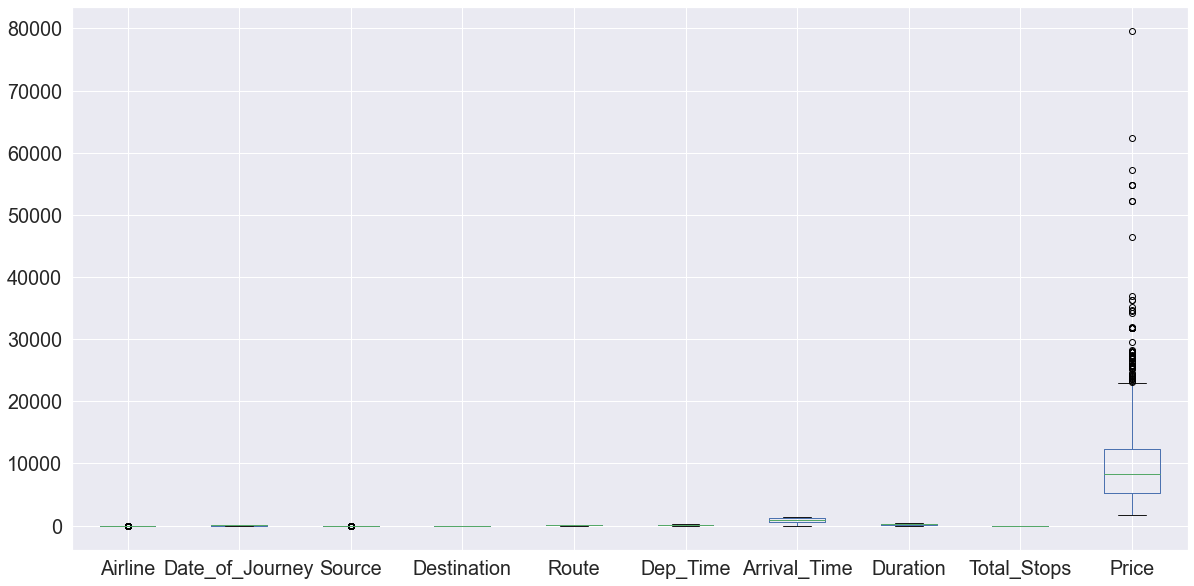

In [133]:
df.plot.box(figsize=(20,10))
sns.set(font_scale=1)

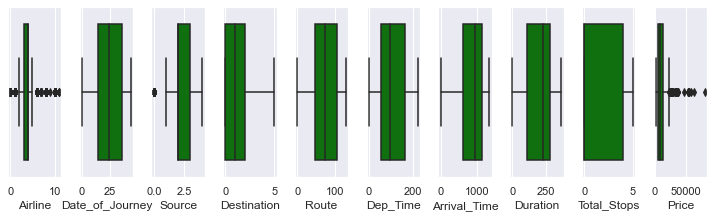

In [134]:
collist=df.columns.values
ncol=30
nrows=30
sns.set(font_scale=1)
plt.figure(figsize=(ncol,3*(ncol)))
for i in range (0, len(collist)):
    plt.subplot(nrows,ncol,i+5)
    sns.boxplot(df[collist[i]],color='green')
    plt.tight_layout()


# Check the percentage of data falls under outliers:

In [135]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([  123,   396,   486,   510,   597,   628,   657,   785,   826,
          936,   946,   959,   975,  1196,  1246,  1341,  1424,  1466,
         1478,  1629,  1654,  1785,  1918,  2055,  2099,  2108,  2495,
         2556,  2618,  2635,  2693,  2924,  3032,  3111,  3257,  3400,
         3535,  3700,  4012,  4521,  4676,  4829,  5013,  5136,  5372,
         5439,  5662,  5701,  5710,  5719,  5738,  5745,  5856,  5986,
         6314,  6407,  6576,  6588,  6605,  6991,  7351,  7356,  7377,
         7537,  7554,  7617,  7713,  7724,  7756,  7902,  8020,  8080,
         8451,  8470,  8536,  8598,  8856,  8940,  8957,  8990,  9019,
         9193,  9239,  9632,  9715,  9974, 10052, 10113, 10160, 10182,
        10189, 10353, 10364, 10383, 10439, 10511], dtype=int64),
 array([9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
        9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
        9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
   

In [136]:
df_new=df[(z<3).all(axis=1)]
df_new

Airline  Date_of_Journey  Source  Destination  Route  Dep_Time  \
0            3               24       0            5     18       211   
1            1                6       3            0     84        31   
2            4               43       2            1    118        70   
3            3               10       3            0     91       164   
4            3                0       0            5     29       149   
...        ...              ...     ...          ...    ...       ...   
10678        0               41       3            0     64       183   
10679        1               29       3            0     64       193   
10680        4               29       0            2     18        58   
10681       10                0       0            5     18        92   
10682        1               42       2            1    108        85   

       Arrival_Time  Duration  Total_Stops  Price  
0               233       240            4   3897  
1               906       336            1   7662  
2               413       106            1  13882  
3              1324       311            0   6218  
4              1237       303            0  13302  
...             ...       ...          ...    ...  
10678          1259       236            4   4107  
10679          1305       237            4   4145  
10680           824       280            4   7229  
10681           938       238            4  12648  
10682          1124       347            1  11753  

[10587 rows x 10 columns]

In [137]:
df.shape

(10683, 10)

In [138]:
df_new.shape

(10587, 10)

In [140]:
percentage_loss=((10687-10587)/10682)*100
print(percentage_loss)

0.9361542782250515


Data loss is very small,hence we can proceed further.

# Split the dataset in input columns and target columns..

In [141]:
x=df_new.drop("Price",axis=1)

In [142]:
y=df_new['Price']

In [143]:
x.shape

(10587, 9)

In [144]:
y.shape

(10587,)

# Removing skewness by transforming data.

In [145]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')
x

array([[-0.29390942,  0.06005704, -1.61362335, ..., -1.79739154,
         0.4597903 ,  1.28775646],
       [-1.41723776, -1.51531272,  0.89766697, ...,  0.04043393,
         1.24251659,  0.34342516],
       [ 0.14822567,  1.48806633, -0.02604514, ..., -1.38603027,
        -0.74940724,  0.34342516],
       ...,
       [ 0.14822567,  0.45095209, -1.61362335, ..., -0.22071461,
         0.79203959,  1.28775646],
       [ 2.11562496, -2.20283738, -1.61362335, ...,  0.14455047,
         0.44291416,  1.28775646],
       [-1.41723776,  1.41626605, -0.02604514, ...,  0.77258011,
         1.32925994,  0.34342516]])

In [146]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[-0.29390942,  0.06005704, -1.61362335, ..., -1.79739154,
         0.4597903 ,  1.28775646],
       [-1.41723776, -1.51531272,  0.89766697, ...,  0.04043393,
         1.24251659,  0.34342516],
       [ 0.14822567,  1.48806633, -0.02604514, ..., -1.38603027,
        -0.74940724,  0.34342516],
       ...,
       [ 0.14822567,  0.45095209, -1.61362335, ..., -0.22071461,
         0.79203959,  1.28775646],
       [ 2.11562496, -2.20283738, -1.61362335, ...,  0.14455047,
         0.44291416,  1.28775646],
       [-1.41723776,  1.41626605, -0.02604514, ...,  0.77258011,
         1.32925994,  0.34342516]])

# Since the column has binary variable we will use linear Regression

# Regression Model Building:
#Linear Regression:

In [147]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score


In [148]:
max_scr=0
for i in range(0,1000):
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=i,test_size=0.20)
    lr.fit(xtrain,ytrain)
    pred_train=lr.predict(xtrain)
    pred_test=lr.predict(xtest)
    if round(r2_score(ytrain,pred_train)*100,2)==round(r2_score(ytest,pred_test)*100,2):
        print("At random state",i," The model performs very well")
        print("At random_state:-",i)
        print("Training r2_score is:-", r2_score(ytrain,pred_train)*100)
        print("Testing r2_score is:-", r2_score(ytest,pred_test)*100)

At random state 255  The model performs very well
At random_state:- 255
Training r2_score is:- 30.03177729533012
Testing r2_score is:- 30.03075342878536
At random state 272  The model performs very well
At random_state:- 272
Training r2_score is:- 30.05197460696073
Testing r2_score is:- 30.05386666361669


In [150]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.20,random_state=272)

In [151]:


lr=LinearRegression()
lr.fit(xtrain,ytrain)
lr.score(xtrain,ytrain)

pred_test=lr.predict(xtest)

from sklearn.metrics import accuracy_score
r2_score(ytest,pred_test)


0.3005386666361669

In [152]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [153]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import numpy as np

In [154]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(ytest,pred_test))
print('Mean Squared Error:',mean_squared_error(ytest,pred_test))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(ytest,pred_test)))

Error:
Mean Absolute Error: 2798.1822312208524
Mean Squared Error: 12090370.978511868
Root Mean Square Error: 3477.121076193906


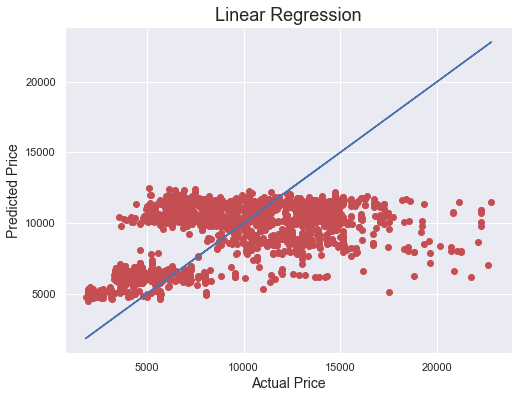

In [155]:
plt.figure(figsize=(8,6))
plt.scatter(x=ytest, y=pred_test, color='r')
plt.plot(ytest,ytest, color='b')
plt.xlabel('Actual Price',fontsize=14)
plt.ylabel('Predicted Price',fontsize=14)
plt.title('Linear Regression',fontsize=18)
plt.show()

# Regurlarization
As we can easily analyis that data is not correctely fit in our model lets do some regurlization.

# 1. Lasso

In [156]:
from sklearn.linear_model import Lasso

parameters = {'alpha':[.0001, .001, .01, .1, 1, 10],'random_state':list(range(0,10))}
ls = Lasso()
clf = GridSearchCV(ls,parameters)
clf.fit(xtrain,ytrain)

print(clf.best_params_)

{'alpha': 0.0001, 'random_state': 0}


In [157]:
ls = Lasso(alpha=.0001,random_state=0)
ls.fit(xtrain,ytrain)
ls.score(xtrain,ytrain)
pred_ls = ls.predict(xtest)

lss = r2_score(ytest,pred_ls)
for j in range(2,10):
    lsscore = cross_val_score(ls,x,y,cv=j)
    lsc = lsscore.mean() 
    print("At cv:-",j)
    print("Cross validation score is:-",lsc*100 )
    print("R2_score is :-",lss*100)
    print("\n")

At cv:- 2
Cross validation score is:- 29.84407093837595
R2_score is :- 30.053867021140444


At cv:- 3
Cross validation score is:- 29.881438914437773
R2_score is :- 30.053867021140444


At cv:- 4
Cross validation score is:- 29.91660978575417
R2_score is :- 30.053867021140444


At cv:- 5
Cross validation score is:- 29.851872699516424
R2_score is :- 30.053867021140444


At cv:- 6
Cross validation score is:- 29.78895493683141
R2_score is :- 30.053867021140444


At cv:- 7
Cross validation score is:- 29.796837136399795
R2_score is :- 30.053867021140444


At cv:- 8
Cross validation score is:- 29.89427981609548
R2_score is :- 30.053867021140444


At cv:- 9
Cross validation score is:- 29.860277126934143
R2_score is :- 30.053867021140444




At cv:- 4
Cross validation score is:- 29.91660978575417
R2_score is :- 30.053867021140444

In [158]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(ytest,pred_ls))
print('Mean Squared Error:',mean_squared_error(ytest,pred_ls))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(ytest,pred_ls)))

Error:
Mean Absolute Error: 2798.1822427635498
Mean Squared Error: 12090370.916712958
Root Mean Square Error: 3477.121067307401


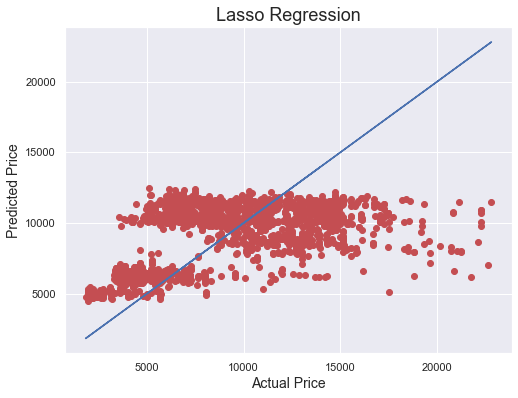

In [159]:
plt.figure(figsize=(8,6))
plt.scatter(x=ytest, y=pred_ls, color='r')
plt.plot(ytest,ytest, color='b')
plt.xlabel('Actual Price',fontsize=14)
plt.ylabel('Predicted Price',fontsize=14)
plt.title('Lasso Regression',fontsize=18)
plt.show()

# 2. Ridge

In [83]:
from sklearn.linear_model import Ridge

parameters = {'alpha':[.0001, .001, .01, .1, 1],'fit_intercept':[True,False],'normalize':[True,False],'copy_X':[True,False],'tol':[0.001,0.01,0.1],'random_state':[0,1,2,3,4,5,6,7,8,9]}
rd = Ridge()
clf = GridSearchCV(rd,parameters)
clf.fit(xtrain,ytrain)

print(clf.best_params_)

{'alpha': 0.001, 'copy_X': True, 'fit_intercept': True, 'normalize': True, 'random_state': 0, 'tol': 0.001}


In [84]:
rd = Ridge(alpha=0.001, copy_X= True, fit_intercept= True, normalize=True, random_state= 0, tol= 0.001)
rd.fit(xtrain,ytrain)
rd.score(xtrain,ytrain)
pred_rd = rd.predict(xtest)
rds = r2_score(ytest,pred_rd)
for j in range(2,10):
    rds = r2_score(ytest,pred_rd)
    
    print("At cv:-",j)
    print('R2 Score:',rds*100)

    rdscore = cross_val_score(rd,x,y,cv=j)
    rdc = rdscore.mean() 
    print('Cross Val Score:',rdc*100)

At cv:- 2
R2 Score: 29.406528926216822
Cross Val Score: 29.198184882941327
At cv:- 3
R2 Score: 29.406528926216822
Cross Val Score: 29.245121800061263
At cv:- 4
R2 Score: 29.406528926216822
Cross Val Score: 29.27655022848366
At cv:- 5
R2 Score: 29.406528926216822
Cross Val Score: 29.217064399485583
At cv:- 6
R2 Score: 29.406528926216822
Cross Val Score: 29.15691234658031
At cv:- 7
R2 Score: 29.406528926216822
Cross Val Score: 29.179490883257426
At cv:- 8
R2 Score: 29.406528926216822
Cross Val Score: 29.25952289753162
At cv:- 9
R2 Score: 29.406528926216822
Cross Val Score: 29.224493892109948


At cv:- 8
R2 Score: 29.406528926216822
Cross Val Score: 29.25952289753162

In [85]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(ytest,pred_rd))
print('Mean Squared Error:',mean_squared_error(ytest,pred_rd))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(ytest,pred_rd)))

Error:
Mean Absolute Error: 2728.7539832512575
Mean Squared Error: 11445280.651042236
Root Mean Square Error: 3383.0874435997416


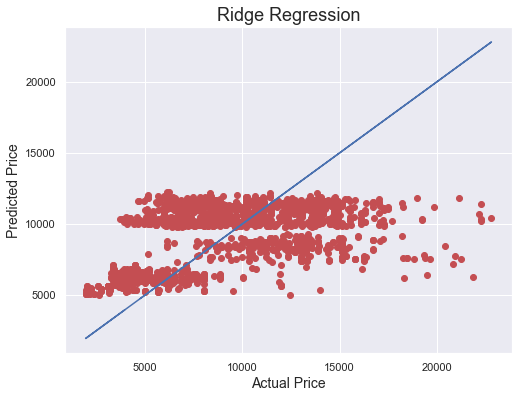

In [86]:
plt.figure(figsize=(8,6))
plt.scatter(x=ytest, y=pred_rd, color='r')
plt.plot(ytest,ytest, color='b')
plt.xlabel('Actual Price',fontsize=14)
plt.ylabel('Predicted Price',fontsize=14)
plt.title('Ridge Regression',fontsize=18)
plt.show()

# Ensemble Techniques:
Decision Tree Regressor

In [87]:
from sklearn.tree import DecisionTreeRegressor

parameters = {'criterion':['mse', 'friedman_mse', 'mae'], 'splitter':['best', 'random'], 'max_features': ['auto', 'sqrt', 'log2']}
dt =DecisionTreeRegressor()
clf = GridSearchCV(dt,parameters)
clf.fit(xtrain,ytrain)

print(clf.best_params_)

{'criterion': 'mse', 'max_features': 'auto', 'splitter': 'best'}


In [109]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(criterion='mse', splitter='best',max_features= 'auto')
dt.fit(xtrain,ytrain)
dt.score(xtrain,ytrain)
pred_decision = dt.predict(xtest)

dts = r2_score(ytest,pred_decision)
for j in range(2,10):
    print("At cv:-",j)
    dts = r2_score(ytest,pred_decision)
    print('R2 Score:',dts*100)

    dtscore = cross_val_score(dt,x,y,cv=j)
    dtc = dtscore.mean() 
    print('Cross Val Score:',dtc*100)

At cv:- 2
R2 Score: 67.04148501450425
Cross Val Score: 65.67243394085888
At cv:- 3
R2 Score: 67.04148501450425
Cross Val Score: 67.27763408259723
At cv:- 4
R2 Score: 67.04148501450425
Cross Val Score: 67.16673277170086
At cv:- 5
R2 Score: 67.04148501450425
Cross Val Score: 67.45442208565018
At cv:- 6
R2 Score: 67.04148501450425
Cross Val Score: 67.18141042347075
At cv:- 7
R2 Score: 67.04148501450425
Cross Val Score: 67.28955275127656
At cv:- 8
R2 Score: 67.04148501450425
Cross Val Score: 67.52601200303661
At cv:- 9
R2 Score: 67.04148501450425
Cross Val Score: 67.62393941404497


At cv:- 6
R2 Score: 67.0984738974079
Cross Val Score: 67.1519852605532

In [89]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(ytest,pred_decision))
print('Mean Squared Error:',mean_squared_error(ytest,pred_decision))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(ytest,pred_decision)))


Error:
Mean Absolute Error: 1457.5578611898015
Mean Squared Error: 5255143.341228492
Root Mean Square Error: 2292.409941792369


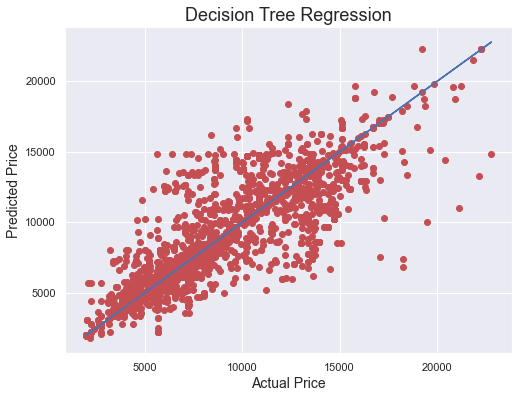

In [90]:
plt.figure(figsize=(8,6))
plt.scatter(x=ytest, y=pred_decision, color='r')
plt.plot(ytest,ytest, color='b')
plt.xlabel('Actual Price',fontsize=14)
plt.ylabel('Predicted Price',fontsize=14)
plt.title('Decision Tree Regression',fontsize=18)
plt.show()

# Gradient Boosting Regressor

In [160]:
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor
parameters = {'loss' : ['ls', 'lad', 'huber', 'quantile'],'n_estimators':[50,100,200],'criterion':['friedman_mse', 'mse']}
gbr=GradientBoostingRegressor()
clf = GridSearchCV(gbr,parameters)
clf.fit(xtrain,ytrain)

print(clf.best_params_)

{'criterion': 'mse', 'loss': 'ls', 'n_estimators': 200}


In [161]:
gbr= GradientBoostingRegressor(criterion='mse',loss='ls',n_estimators=200)
gbr.fit(xtrain, ytrain)
gbr.score(xtrain, ytrain)
pred_gradient = gbr.predict(xtest)

for j in range(2,10):
    print("At cv:-",j)

    gbrs= r2_score(ytest,pred_gradient)
    print('R2 Score:',gbrs*100)

    gbscore = cross_val_score(gbr,x,y,cv=j)
    gbrc= gbscore.mean() 
    print('Cross Val Score:',gbrc*100)

At cv:- 2
R2 Score: 79.49745794802463
Cross Val Score: 79.60350884882614
At cv:- 3
R2 Score: 79.49745794802463
Cross Val Score: 79.70340307050577
At cv:- 4
R2 Score: 79.49745794802463
Cross Val Score: 79.8642280923496
At cv:- 5
R2 Score: 79.49745794802463
Cross Val Score: 79.7843371367149
At cv:- 6
R2 Score: 79.49745794802463
Cross Val Score: 79.8805580574301
At cv:- 7
R2 Score: 79.49745794802463
Cross Val Score: 79.88012303396522
At cv:- 8
R2 Score: 79.49745794802463
Cross Val Score: 79.95989227814174
At cv:- 9
R2 Score: 79.49745794802463
Cross Val Score: 79.94157802931272


At cv:- 9
R2 Score: 78.75484367987153
Cross Val Score: 79.13293313338862

In [93]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(ytest,pred_gradient))
print('Mean Squared Error:',mean_squared_error(ytest,pred_gradient))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(ytest,pred_gradient)))


Error:
Mean Absolute Error: 1407.0415006465203
Mean Squared Error: 3444465.5130357672
Root Mean Square Error: 1855.927130314056


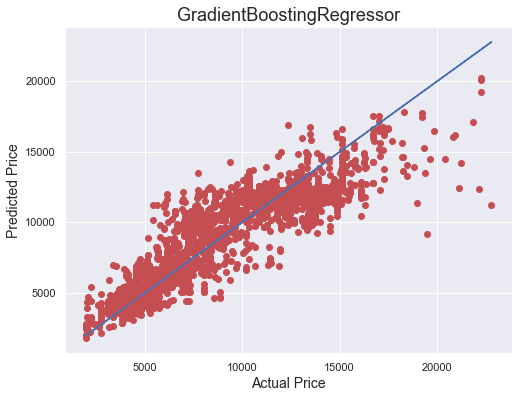

In [94]:
plt.figure(figsize=(8,6))
plt.scatter(x=ytest, y=pred_gradient, color='r')
plt.plot(ytest,ytest, color='b')
plt.xlabel('Actual Price',fontsize=14)
plt.ylabel('Predicted Price',fontsize=14)
plt.title('GradientBoostingRegressor',fontsize=18)
plt.show()

# Support vector Regression

In [95]:
from sklearn.svm import SVR

parameters = { 'kernel': ['linear', 'poly','rbf', 'sigmoid'] ,'gamma': ['auto', 'scale'],'cache_size':[50,100,200,300]}
sv = SVR()
clf = GridSearchCV(sv,parameters)
clf.fit(xtrain,ytrain)

print(clf.best_params_)

{'cache_size': 50, 'gamma': 'auto', 'kernel': 'linear'}


In [96]:
sv = SVR(kernel = 'linear', gamma = 'auto',cache_size= 50)
sv.fit(xtrain,ytrain)
sv.score(xtrain,ytrain)
pred_vector = sv.predict(xtest)

for j in range(2,10):
    print("At cv:-",j)


    svs = r2_score(ytest,pred_vector)
    print('R2 Score:',svs*100)

    svscore = cross_val_score(sv,x,y,cv=j)
    svc = svscore.mean() 
    print('Cross Val Score:',svc*100)

At cv:- 2
R2 Score: 24.012496384849513
Cross Val Score: 22.092315468322827
At cv:- 3
R2 Score: 24.012496384849513
Cross Val Score: 23.628884055392508
At cv:- 4
R2 Score: 24.012496384849513
Cross Val Score: 24.358458158901925
At cv:- 5
R2 Score: 24.012496384849513
Cross Val Score: 24.54204201957812
At cv:- 6
R2 Score: 24.012496384849513
Cross Val Score: 24.656034698751817
At cv:- 7
R2 Score: 24.012496384849513
Cross Val Score: 24.75446018013398
At cv:- 8
R2 Score: 24.012496384849513
Cross Val Score: 24.893209765938686
At cv:- 9
R2 Score: 24.012496384849513
Cross Val Score: 24.877445923804224


In [97]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(ytest,pred_gradient))
print('Mean Squared Error:',mean_squared_error(ytest,pred_gradient))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(ytest,pred_gradient)))


Error:
Mean Absolute Error: 1407.0415006465203
Mean Squared Error: 3444465.5130357672
Root Mean Square Error: 1855.927130314056


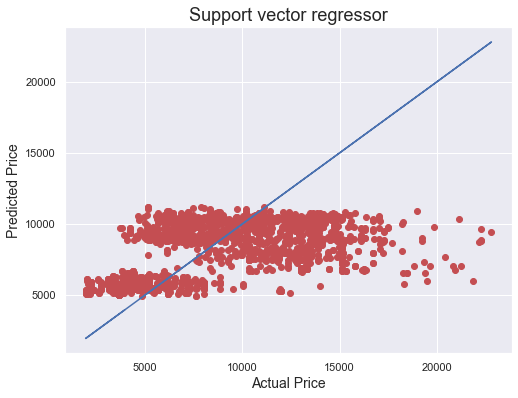

In [98]:
plt.figure(figsize=(8,6))
plt.scatter(x=ytest, y=pred_vector, color='r')
plt.plot(ytest,ytest, color='b')
plt.xlabel('Actual Price',fontsize=14)
plt.ylabel('Predicted Price',fontsize=14)
plt.title('Support vector regressor',fontsize=18)
plt.show()


# KNeighborsRegressor

In [99]:
from sklearn.neighbors import KNeighborsRegressor

parameters = { 'weights':['uniform', 'distance'] ,'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],'n_neighbors':[5,10,15,20,25]}
kn = KNeighborsRegressor()
clf = GridSearchCV(kn,parameters)
clf.fit(xtrain,ytrain)

print(clf.best_params_)

{'algorithm': 'brute', 'n_neighbors': 5, 'weights': 'uniform'}


In [100]:
kn = KNeighborsRegressor(algorithm = 'brute', weights = 'uniform',n_neighbors=5)
kn.fit(xtrain,ytrain)
kn.score(xtrain,ytrain)
pred_k = kn.predict(xtest)

for j in range(2,10):
    print("At cv:-",j)


    kns = r2_score(ytest,pred_k)
    print('R2 Score:',kns*100)

    knscore = cross_val_score(kn,x,y,cv=j)
    kvc = knscore.mean() 
    print('Cross Val Score:',kvc*2)

At cv:- 2
R2 Score: 69.9728068325971
Cross Val Score: 1.2969422555539984
At cv:- 3
R2 Score: 69.9728068325971
Cross Val Score: 1.3331274422665147
At cv:- 4
R2 Score: 69.9728068325971
Cross Val Score: 1.3440630687722588
At cv:- 5
R2 Score: 69.9728068325971
Cross Val Score: 1.3415317978526171
At cv:- 6
R2 Score: 69.9728068325971
Cross Val Score: 1.3500021814473955
At cv:- 7
R2 Score: 69.9728068325971
Cross Val Score: 1.357031605701806
At cv:- 8
R2 Score: 69.9728068325971
Cross Val Score: 1.3546056893316891
At cv:- 9
R2 Score: 69.9728068325971
Cross Val Score: 1.3562438498766474


In [101]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(ytest,pred_k))
print('Mean Squared Error:',mean_squared_error(ytest,pred_k))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(ytest,pred_k)))


Error:
Mean Absolute Error: 1605.1016052880077
Mean Squared Error: 4868292.318489141
Root Mean Square Error: 2206.4207029687564


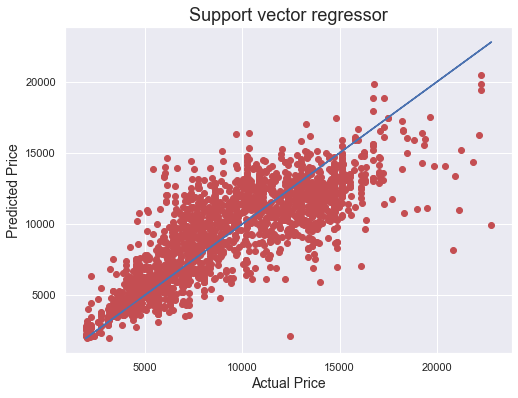

In [102]:
plt.figure(figsize=(8,6))
plt.scatter(x=ytest, y=pred_k, color='r')
plt.plot(ytest,ytest, color='b')
plt.xlabel('Actual Price',fontsize=14)
plt.ylabel('Predicted Price',fontsize=14)
plt.title('Support vector regressor',fontsize=18)
plt.show()


# We tested 7 models out of which Gradient Boosting  Regression performing Best as Accuracy score and CV is Optimum.

# Conclusion

In [103]:
import numpy as np
a=np.array(ytest)
a

array([ 4773,  6752, 15078, ..., 14781,  4697,  3971], dtype=int64)

In [104]:
predicted=np.array(pred_gradient)
predicted

array([ 6895.56422154,  7119.77816348, 13731.92007988, ...,
       12021.63325633,  7212.89041478,  4134.51995036])

In [105]:
df_com=pd.DataFrame({"original":a,"predicted":predicted}, index= range(len(a)))

In [106]:
df_com

original     predicted
0         4773   6895.564222
1         6752   7119.778163
2        15078  13731.920080
3        11667  11750.511747
4         6582   5737.373534
...        ...           ...
2113      7878   8635.098907
2114      5000   5588.832056
2115     14781  12021.633256
2116      4697   7212.890415
2117      3971   4134.519950

[2118 rows x 2 columns]

In [107]:
df_com.head(10)

original     predicted
0      4773   6895.564222
1      6752   7119.778163
2     15078  13731.920080
3     11667  11750.511747
4      6582   5737.373534
5      6558   5998.395586
6      3419   4478.579989
7     15812  13932.470916
8      4778   7408.800106
9      5228   5766.586421

# The best model is Gradient Bossting Regressor. Since the difference between the percentage score of cross validation and r2_score is optimum.

At cv:- 9
R2 Score: 78.75484367987153
Cross Val Score: 79.13293313338862

Our Model performs with Accuracy 78.74%...
Saving the best models with initials...using pickle library

In [111]:
import pickle
filename = 'Flight_Price_Prediction.pkl'
pickle.dump(gbr, open(filename, 'wb'))